# Week 10 - Precision Recall

Addresses
* Imbalanced Binary Class
* Precision Recall Tradeoff

In [1]:
# get dataset from https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud
import pandas as pd

credit = pd.read_csv('creditcard.csv')
print(credit.shape)
print(credit.head())
print(credit.info())

(284807, 31)
   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V

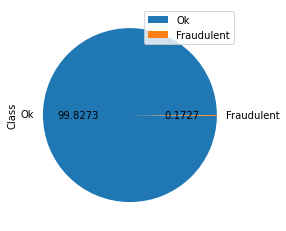

In [2]:
# show imbalance of dependent variable Class
import numpy as np

def absolute_value(val):
    return np.round(val.sum(), 4)

credit['Class'].value_counts().plot.pie(labels=['Ok', 'Fraudulent'], autopct=absolute_value).legend();

Having a model that simply predicts 0 for every example will return 99.83% accuracy which is typically excellent for a binary classification predictor but not in this case. Although this naïve model maintains a high classification accuracy it does nothing to solve the problem so we will evaluate precision and recall instead.

https://towardsdatascience.com/precision-vs-recall-evaluating-model-performance-in-credit-card-fraud-detection-bb24958b2723

In [3]:
# robustscaler less sensitive to outliers
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()

credit['scaled_amount'] = scaler.fit_transform(credit['Amount'].values.reshape(-1,1))
credit['scaled_time'] = scaler.fit_transform(credit['Time'].values.reshape(-1,1))

credit.drop(['Time','Amount'], axis=1, inplace=True)

In [4]:
# split the titanic data into train test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
                                credit.drop(['Class'], axis=1), 
                                credit['Class'], 
                                test_size=0.25, 
                                random_state=42)

print(X_train.shape)
print(X_train.head())

(213605, 30)
              V1        V2        V3        V4        V5        V6        V7  \
83225  -1.648591  1.228130  1.370169 -1.735542 -0.029455 -0.484129  0.918645   
52800  -0.234775 -0.493269  1.236728 -2.338793 -1.176733  0.885733 -1.960981   
21293   1.134626 -0.774460 -0.163390 -0.533358 -0.604555 -0.244482 -0.212682   
133600  0.069514  1.017753  1.033117  1.384376  0.223233 -0.310845  0.597287   
38225  -0.199441  0.610092 -0.114437  0.256565  2.290752  4.008475 -0.123530   

              V8        V9       V10  ...       V21       V22       V23  \
83225  -0.438750  0.982144  1.241635  ... -0.218076 -0.203458 -0.213015   
52800  -2.363412 -2.694774  0.360215  ... -1.495358 -0.083066  0.074612   
21293   0.040782 -1.136627  0.792009  ... -0.684454 -1.855269  0.171997   
133600 -0.127658 -0.701533  0.070739  ...  0.097023  0.369957 -0.219266   
38225   1.038374 -0.075846  0.030453  ... -0.019733  0.165463 -0.080978   

             V24       V25       V26       V27       V2

0    99.82
1     0.18
Name: Class, dtype: float64


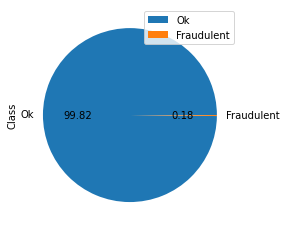

In [5]:
# show imbalance of dependent variable Class
import numpy as np

def absolute_value(val):
    return np.round(val.sum(), 2)

print((y_train.value_counts()/len(y_train) * 100).round(2))
y_train.value_counts().plot.pie(labels=['Ok', 'Fraudulent'], autopct=absolute_value).legend();

In [6]:
# is it balanced? no, use class_weight='balanced'
# is it a large dataset? kind of, using liblinear for solver
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

model = LogisticRegression(solver='liblinear')
model.fit(X_train, y_train)
predictions = model.predict(X_test)

## Revisit Confusion Matrix

In [7]:
# comparing pivot table and confustion matrix
from sklearn.metrics import confusion_matrix

tn, fp, fn, tp = confusion_matrix(y_test, predictions).ravel()
print('Confusion Matrix')
print(confusion_matrix(y_test, predictions))
print()
print('Recall our Confustion Matrix')
print(f'''
                    predicted
                   |  0   |  1     
           -----------------------  ----------------------------------------------
           0       |  {tn}  |  {fp}      tnr                 |  fpr (type I error) 
  actual   -----------------------  ----------------------------------------------
           1       |  {fn}   |  {tp}     fnr (type II error) |  tpr (recall)

                     npv  | fdr
           ----------------------------
                     for  | precision (ppv)

''')

Confusion Matrix
[[71077    12]
 [   45    68]]

Recall our Confustion Matrix

                    predicted
                   |  0   |  1     
           -----------------------  ----------------------------------------------
           0       |  71077  |  12      tnr                 |  fpr (type I error) 
  actual   -----------------------  ----------------------------------------------
           1       |  45   |  68     fnr (type II error) |  tpr (recall)

                     npv  | fdr
           ----------------------------
                     for  | precision (ppv)




In [8]:
tn, fp, fn, tp = confusion_matrix(y_test, predictions).ravel()
print('accuracy:', accuracy_score(predictions, y_test))
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

accuracy: 0.9991994606893064
[[71077    12]
 [   45    68]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71089
           1       0.85      0.60      0.70       113

    accuracy                           1.00     71202
   macro avg       0.92      0.80      0.85     71202
weighted avg       1.00      1.00      1.00     71202



Precision is percent of correct predictions out of all predicted fraudulent. Recall is percent of actual fraudulent transactions correctly identified as such.

In [9]:
print('precision:', tp / (tp + fp))
print('recall:', tp / (tp + fn))

precision: 0.85
recall: 0.6017699115044248


### Metrics Review

https://towardsdatascience.com/avoiding-confusion-with-confusion-matrix-metrics-a8a3d0ead144

* tn = pred 0 actual 0
* fp = pred 1 actual 0
* fn = pred 0 actual 1
* tp = pred 1 actual 1
* acc(uracy) = $\frac{tn + tp}{total}$
* error = $\frac{fp + fn}{total}$
* prev(alence) = $\frac{fn + tp}{total}$
* queue = $\frac{fp + tp}{total}$
* tpr = $\frac{tp}{tp + fn}$
    * true positive rate
    * recall
    * sensitivity
    * prob of detection
    * 1 - fnr
* fnr = $\frac{fn}{tp + fn}$
    * false negative rate
    * type II error
    * 1 - tpr
* tnr = $\frac{tn}{tn + fp}$
    * true negative rate
    * specificity
    * 1 - fpr
* fpr = $\frac{fp}{tn + fp}$
    * false positive rate
    * type I error
    * fall out
    * prob of false claim
    * 1 - tnr
* ppv = $\frac{tp}{tp + fp}$
    * positive predicted value
    * precision
    * 1 - fdr
* fdr = $\frac{fp}{tp + fp}$
    * false discovery rate
    * 1 - ppv
* npv = $\frac{tn}{tn + fn}$
    * negative predicted value
    * 1 - for
* for = $\frac{fn}{tn + fn}$
    * false omission rate
    * 1 - npv
* liklihood ratio+ (lr+) = $\frac{tpr}{fpr}$
    * roc
* liklihood ratio- (lr-) = $\frac{fnr}{tnr}$
* diagnostic odds ratio = $\frac{lr+}{lr-}$
* f1 score = 2 * $\frac{precision-recall}{precision+recall}$
* Youden's J = sensitivity + specificity - 1 = tpr - fpr
* Matthew's Correlation Coefficient = $\frac{(tp*tn)-(fp*tp)}{\sqrt{(tp+fp)(tp+fn)(tn+fp)(tn+fn)}}$

In [10]:
# is it balanced? no, use class_weight='balanced'
# is it a large dataset? kind of, using liblinear for solver
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

model = LogisticRegression(class_weight='balanced', solver='liblinear')
model.fit(X_train, y_train)
predictions = model.predict(X_test)

print('accuracy:', accuracy_score(predictions, y_test))
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

accuracy: 0.9757731524395382
[[69373  1716]
 [    9   104]]
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     71089
           1       0.06      0.92      0.11       113

    accuracy                           0.98     71202
   macro avg       0.53      0.95      0.55     71202
weighted avg       1.00      0.98      0.99     71202



The F1 score can be interpreted as a harmonic mean of the precision and recall, where an F1 score reaches its best value at 1 and worst score at 0. The relative contribution of precision and recall to the F1 score are equal. The formula for the F1 score is:

f1 = 2 * (precision * recall) / (precision + recall)

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html